In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn

%matplotlib inline

In [17]:
#  r==Raw historical data downloaded from Yahoo finance.  Using five years worth of data for calculation.
#  Use the built in function to calculate daily percent change
SPY  = pd.read_csv('SPY.csv');  SPY['pct'] = SPY['Adj Close'].pct_change()
TLT  = pd.read_csv('TLT.csv');  TLT['pct'] = TLT['Adj Close'].pct_change()
GLD  = pd.read_csv('GLD.csv');  GLD['pct'] = GLD['Adj Close'].pct_change()
XRX  = pd.read_csv('XRX.csv');  XRX['pct'] = XRX['Adj Close'].pct_change()
FXB  = pd.read_csv('FXB.csv');  FXB['pct'] = FXB['Adj Close'].pct_change()
AAPL= pd.read_csv('AAPL.csv');  AAPL['pct'] = AAPL['Adj Close'].pct_change()

In [18]:
#  Extract percent change to numpy vectors and delete first entry (nan)
spy  = SPY['pct'].to_numpy(); spy = np.delete(spy, 0)
tlt  = TLT['pct'].to_numpy(); tlt = np.delete(tlt, 0)
gld  = GLD['pct'].to_numpy(); gld = np.delete(gld, 0)
xrx  = XRX['pct'].to_numpy(); xrx = np.delete(xrx, 0)
fxb  = FXB['pct'].to_numpy(); fxb = np.delete(fxb, 0)
aapl = AAPL['pct'].to_numpy(); aapl = np.delete(aapl, 0)

##  TLT

beta =  -0.3152848552616782
Corr =  -0.4306738567357121


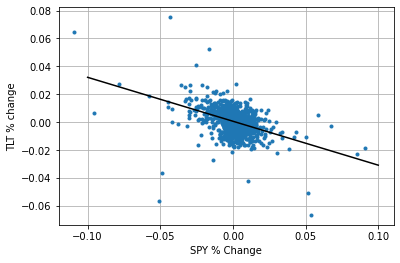

In [19]:
#  Plot raw TLT Data
plt.plot(spy, tlt, '.')
plt.grid(True)
plt.xlabel('SPY % Change')
plt.ylabel('TLT % change')

#  Do linear regression calculating the slope (beta) and correlation (stored in r_value)
slope, intercept, r_value, p_value, std_err =  linregress(spy, tlt)

#  Plot regression line
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')

#  Print beta and correlation
print('beta = ', slope)
print('Corr = ', r_value)

##  GLD

beta =  -0.03570376102084556
Corr =  -0.0506277208354795


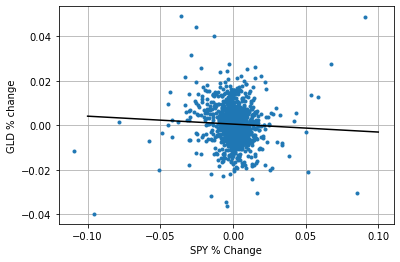

In [20]:
plt.plot(spy, gld, '.')
plt.grid(True)
plt.xlabel('SPY % Change')
plt.ylabel('GLD % change')

slope, intercept, r_value, p_value, std_err =  linregress(spy, gld)
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')
print('beta = ', slope)
print('Corr = ', r_value)

## XRX

beta =  1.3030535479870375
Corr =  0.6353346800020285


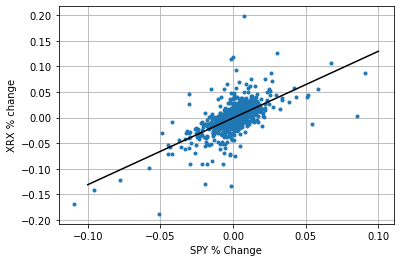

In [21]:
plt.plot(spy, xrx, '.')
plt.grid(True)
plt.xlabel('SPY % Change')
plt.ylabel('XRX % change')

slope, intercept, r_value, p_value, std_err =  linregress(spy, xrx)
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')
print('beta = ', slope)
print('Corr = ', r_value)

##  FXB

beta =  0.09501821782551567
Corr =  0.17828851479925187


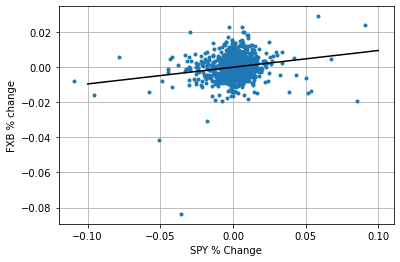

In [22]:
plt.plot(spy, fxb, '.')
plt.grid(True)
plt.xlabel('SPY % Change')
plt.ylabel('FXB % change')

slope, intercept, r_value, p_value, std_err =  linregress(spy, fxb)
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')
print('beta = ', slope)
print('Corr = ', r_value)

##  AAPL

beta =  1.1689230926070868
Corr =  0.7582611515188072


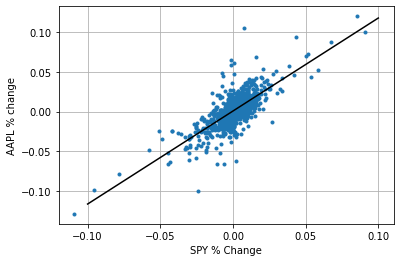

In [23]:
plt.plot(spy, aapl, '.')
plt.grid(True)
plt.xlabel('SPY % Change')
plt.ylabel('AAPL % change')

slope, intercept, r_value, p_value, std_err =  linregress(spy, aapl)
x = np.linspace(-.1, .1)
plt.plot(x, slope * x + intercept, 'k')
print('beta = ', slope)
print('Corr = ', r_value)

##  From within Pandas

In [24]:
#  Create a data frame made of our percent changes for each underlying
data = [SPY['pct'], TLT['pct'], GLD['pct'], XRX['pct'], FXB['pct'], AAPL['pct']]
headers = ['SPY', 'TLT', 'GLD', 'XRX', 'FXB', 'AAPL']
pct_frame = pd.concat(data, axis=1, keys=headers)

#  Use the built in pandas function to calculate correlation
corr_frame = pct_frame.corr()
corr_frame

,SPY,TLT,GLD,XRX,FXB,AAPL
SPY,1.000000,-0.430674,-0.050628,0.635335,0.178289,0.758261
TLT,-0.430674,1.000000,0.355903,-0.257432,-0.031545,-0.337137
GLD,-0.050628,0.355903,1.000000,-0.036010,0.172797,-0.050054
XRX,0.635335,-0.257432,-0.036010,1.000000,0.181355,0.421304
FXB,0.178289,-0.031545,0.172797,0.181355,1.000000,0.085034
AAPL,0.758261,-0.337137,-0.050054,0.421304,0.085034,1.000000


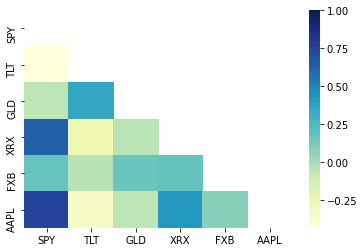

In [25]:
#  Create a mask to hide upper part of the correlation matrix
mask = np.triu(np.ones_like(corr_frame, dtype=np.bool))

#  Create heat map
seaborn.heatmap(corr_frame, cmap='YlGnBu', mask = mask)

##  Within Numpy

In [26]:
#  The corrcoef function in Numpy requires each data set be a row vector
spy.shape = (1, spy.size)
tlt.shape = (1, tlt.size)
gld.shape = (1, gld.size)
xrx.shape = (1, xrx.size)
fxb.shape = (1, fxb.size)
aapl.shape = (1, aapl.size)

#  Stack vectors into a matrix
data = np.vstack( (spy, tlt, gld, xrx, fxb, aapl) )

#  Use Numpy's corrcoef function to get correlation matrix and generate a heat map
corr_matrix = np.corrcoef(data)
print(corr_matrix)

[[ 1.         -0.43067386 -0.05062772  0.63533468  0.17828851  0.75826115]
 [-0.43067386  1.          0.35590284 -0.25743214 -0.03154495 -0.33713735]
 [-0.05062772  0.35590284  1.         -0.03600969  0.17279666 -0.05005369]
 [ 0.63533468 -0.25743214 -0.03600969  1.          0.18135546  0.42130376]
 [ 0.17828851 -0.03154495  0.17279666  0.18135546  1.          0.08503356]
 [ 0.75826115 -0.33713735 -0.05005369  0.42130376  0.08503356  1.        ]]


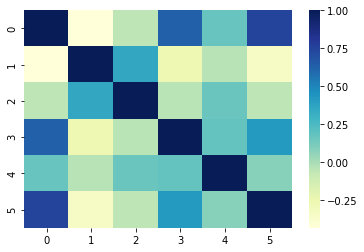

In [27]:
seaborn.heatmap(corr_matrix, cmap='YlGnBu')